In [66]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, 
                             accuracy_score)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, 
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, accuracy_score)
# Base Libraries
from tensorflow.keras.applications import  VGG19,EfficientNetB0,VGG16,InceptionV3,ResNet50,EfficientNetB3
from tensorflow.keras.models import Model
from keras.applications.vgg16 import preprocess_input
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.pipeline import Pipeline
# Feature Selection


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [67]:
train2=os.listdir("train")

In [68]:
train2

['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Vasculitis Photos',
 'Warts Molluscum and other Viral Infections']

In [69]:
cat2=['Melanoma Skin Cancer Nevi and Moles']

In [70]:
cat=['Acne and Rosacea Photos',
 'Normal',
 'vitiligo',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
     'Melanoma Skin Cancer Nevi and Moles',
 'Eczema Photos']

In [71]:
def data_dictionary():
    path_train="skin/train/"
    path_test="train/"
    list_train=cat#os.listdir(path_train)
    list_train1=cat2
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j            
            if img_path_train!="skin/train/Normal/34.avif":
                
                train_dictionary["image_path"].append(img_path_train)
                train_dictionary['target'].append(k) 
        k+=1
    for i in list_train1:
        path_disease_test=path_test+i
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_test:
            img_path_train=path_disease_test+"/"+j            
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(4)
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [72]:
train=data_dictionary()

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7324 entries, 0 to 7323
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  7324 non-null   object
 1   target      7324 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 114.6+ KB


In [74]:
# train['image_path']

In [75]:
# for i in train['image_path']:
#     img = cv2.imread(i)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     plt.imshow(img)
#     break

In [76]:
# for i in range(len(train['image_path'])):
#     img = cv2.imread(train['image_path'][i])
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     plt.imshow(img)
#     break

In [77]:
# x = [1,2,3]
# for i in range(len(x)):
#     print(1)

In [78]:
# img = cv2.imread(train['image_path'][1957])
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)

In [79]:
train['image_path'][1958]

'skin/train/vitiligo/--------------_jpg.rf.22ab968af030e8814e5b3c7619f2d9b4.jpg'

In [80]:
import cv2
images=[]
label=[]
for i in train['image_path']:
    if i!="skin/train/Normal/34.avif":
        if i:
            img=cv2.imread(i)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,(180,180))
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            #img=cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
            #img=resize_and_rescale(img)
            images.append(img)


In [81]:
len(images)

7324

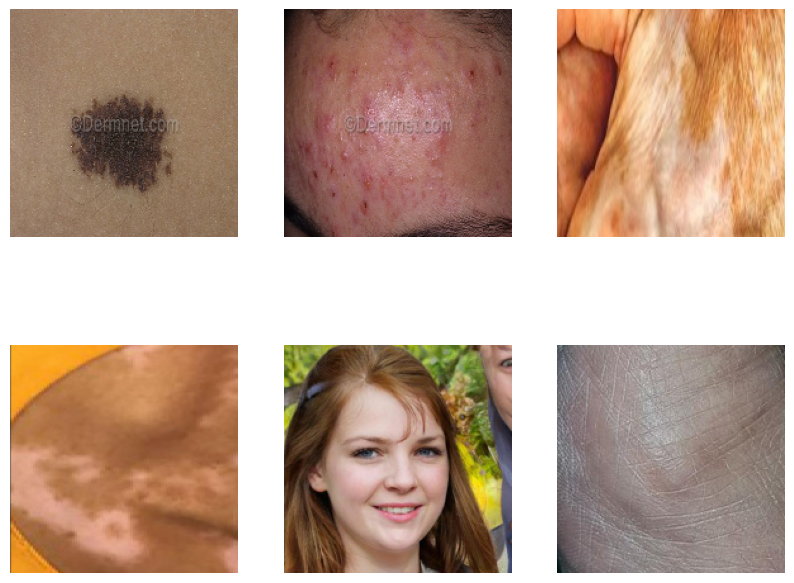

In [82]:

# Create a list of example inputs to our Gradio demo
example_list = [image for image in random.sample(images, k=6)]

# Plot the images in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

for ax, img_array in zip(axes.ravel(), example_list):
    ax.imshow(img_array)
    ax.axis('off')

plt.show()


In [83]:
label=train['target']

In [84]:
len(label)

7324

In [85]:
len(images)

7324

In [86]:
import numpy as np
import pandas as pd

In [87]:
data=np.array(images)


In [88]:
label=np.array(label)

In [89]:
data.shape

(7324, 180, 180, 3)

In [90]:
label.shape

(7324,)

In [91]:
!pip install sklearn_relief

In [92]:
vgg_model = VGG19(weights = 'imagenet',  include_top = False, input_shape = (180, 180, 3)) 

80134624/80134624 [==============================] - 5s 0us/step


In [93]:
# let's make all layers non-trainable
for layer in vgg_model.layers : 
    layer.trainable = False

In [94]:
from keras.utils.vis_utils import plot_model
plot_model(vgg_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense


In [96]:
model=Sequential([ 
                   
                    Dense(200,activation='relu'),
                  Dense(170,activation='relu'),
                  Dense(6,activation='softmax'),

])

In [97]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [98]:
mcp_save = ModelCheckpoint('EnetB0_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)

In [99]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [100]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split 
kf = KFold(n_splits = 3)

In [101]:
import keras
acc=[]
num_classes = 6
label = keras.utils.to_categorical(label, num_classes)

In [102]:
label.shape


(7324, 6)

In [103]:

for i in range(3): 
    x_train,x_test, y_train, y_test=train_test_split(data, label, test_size=0.2,random_state = np.random.randint(1,1000, 1)[0])
    print(x_train.shape)
    # let's make all layers non-trainable
    for layer in vgg_model.layers :
        layer.trainable = False
    features_train=vgg_model.predict(x_train)
    features_test=vgg_model.predict(x_test)
    print(features_train.shape)
    num_train=x_train.shape[0]
    num_test=x_test.shape[0]
    print(num_train)
    print(num_test)
    x_test=features_test.reshape(num_test,-1)
    x_train=features_train.reshape(num_train,-1)
    print(x_train.shape)
    print(x_train.shape)
    #x_train,x_valid,y_train,y_valid= train_test_split(x_train, y_train, test_size=0.1,random_state = np.random.randint(1,1000, 1)[0]) 
#     history=model.fit(x_train,y_train,epochs=15,batch_size=32,verbose=1) 
#     model.evaluate(x_test,y_test)

(5859, 180, 180, 3)
46/46 [==============================] - 14s 311ms/step
(5859, 5, 5, 512)
5859
1465
(5859, 12800)
(5859, 12800)
(5859, 180, 180, 3)
46/46 [==============================] - 10s 219ms/step
(5859, 5, 5, 512)
5859
1465
(5859, 12800)
(5859, 12800)
(5859, 180, 180, 3)


ResourceExhaustedError: Graph execution error:

Detected at node 'vgg19/block1_conv1/Relu' defined at (most recent call last):
    File "C:\Users\user\.conda\envs\tf\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\user\.conda\envs\tf\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\user\.conda\envs\tf\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\user\.conda\envs\tf\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\user\.conda\envs\tf\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\user\AppData\Local\Temp\ipykernel_15120\563305271.py", line 7, in <module>
      features_train=vgg_model.predict(x_train)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\user\.conda\envs\tf\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'vgg19/block1_conv1/Relu'
OOM when allocating tensor with shape[32,64,180,180] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node vgg19/block1_conv1/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_701]

In [ ]:
history = model.fit(x_train, y_train, epochs=25)


In [ ]:
model.save('6claass.h5')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred2=np.argmax(y_pred, axis=1)
y_pred2

In [ ]:
y_test=np.argmax(y_test, axis=1)

In [ ]:
y_test

In [ ]:
confusion_matrix_result=confusion_matrix(y_test,y_pred2)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     
import pylab as pl
plt.title("skin detection  using VGG19 ")

ax= plt.subplot()
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', ax=ax);
pl.show()

In [ ]:
train_accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))
# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')

plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')

plt.title('Loss ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import tensorflow as tf
import keras
import pickle

In [ ]:
confusion_matrix=classification_report(y_test,y_pred2)

In [ ]:
print(confusion_matrix)

In [ ]:
import tensorflow as tf
import numpy as np
import cv2

import tensorflow as tf
import numpy as np
import cv2

def predict_skin_disease(image_path):
    # Load saved model
    model = tf.keras.models.load_model('6claass.h5')

    # Load and preprocess image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    img=vgg_model.predict(img)
    img=img.reshape(1,-1)
    
    # Make prediction on preprocessed image
    pred = model.predict(img)[0]
    predicted_class = np.argmax(pred)

    return predicted_class


print(predict_skin_disease("/kaggle/input/skindatasets/skin/test/Normal/0_0_aidai_0029.jpg"))

In [ ]:
print(y_train)

In [ ]:
import tensorflow as tf
import numpy as np
import cv2

def predict_skin_disease(image_path):
    # Define list of class names
    class_names = ["Acne","Eczema","Atopic","Psoriasis","Tinea","vitiligo"]

    # Load saved model
    model = tf.keras.models.load_model('6claass.h5')

    # Load and preprocess image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    img = vgg_model.predict(img)
    img = img.reshape(1, -1)

    # Make prediction on preprocessed image
    pred = model.predict(img)[0]
    predicted_class_index = np.argmax(pred)
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

print(predict_skin_disease("/kaggle/input/dermnet/test/Atopic Dermatitis Photos/03ichthyosis050127.jpg"))
